In [2]:
#READING CSV
import pandas as pd
from copy import deepcopy
from google.colab import drive 
drive.mount('/content/gdrive')

almacenes = pd.read_csv("/content/gdrive/MyDrive/Trabajos 7mo Ciclo/Complejidad/almacenes.csv")
alm = almacenes[['Coord X', 'Coord Y']]
nodeTypeALM = [1]*100
alm['NodeType'] = nodeTypeALM

puntos_entrega = pd.read_csv("/content/gdrive/MyDrive/Trabajos 7mo Ciclo/Complejidad/puntos_entrega.csv")
pe = puntos_entrega[['Coord X', 'Coord Y']]
nodeTypePE = [2]*5000
pe['NodeType'] = nodeTypePE

Mounted at /content/gdrive


In [12]:
newDF = pd.concat([alm, pe])

nodeTypeList = newDF[['Coord X', 'Coord Y', 'NodeType']].values.tolist()
noTypeList = newDF[['Coord X', 'Coord Y']].values.tolist()

#List to use
adyList = deepcopy(nodeTypeList)
#print(adyList)

In [13]:
#Sorting List
def orderList(list_):
    newL = sorted(list_, key=lambda y: y[1])
    newL.sort(key=lambda x: x[0])
    return deepcopy(newL)

newL = orderList(noTypeList)
newTypeList = orderList(adyList)
# print(newL)
# print(newTypeList)

In [14]:
#Almacén/Punto de entrega Nodes to append
def popStuff(popList, times):
    to_return = []
    popList.reverse()
    for j in range(times):
        to_return.append(popList.pop())
    popList.reverse()
    return to_return

#Search X Coords Nodes
def searchX(tempList, tempNodeTypeList, x):
    returnList = []
    max = 0
    for i in tempList:
        if i[0] == x:
            max += 1
            returnList.append(i)
        else:
            popStuff(tempList, max)
            popped = popStuff(tempNodeTypeList, max)
            return returnList, popped

In [15]:
# Create graph
def graph(nodesList, newL_, newTypeList_):
    xList = [i for i in range(1000)]
    yList = [i for i in range(1000)]
    nodesCont = 0

    tempNoTypeList = deepcopy(newL_)
    tempTypeList = deepcopy(newTypeList_)

    for x in xList:
        smallList = []
        popped = []
        smallList, popped = searchX(tempNoTypeList, tempTypeList, x)
        for y in yList:
            ady1 = nodesCont - 1000 #left then goes clockwise
            ady2 = nodesCont - 1
            ady3 = nodesCont + 1000
            ady4 = nodesCont + 1
            # Validations - not corners
            if x == 0: ady1 = -1
            if x == 999: ady3 = -1
            if y == 0: ady2 = -1
            if y == 999: ady4 = -1

            ady0 = [ady1, ady2, ady3, ady4]

            if [x, y] in smallList:
                t = popped.pop(0)
                nodesList.append([t[0], t[1], t[2], ady0])
            else:
                nodesList.append([x, y, 0, ady0])
            
            nodesCont += 1

In [16]:
nodes = []
graph(nodes, newL, newTypeList)

In [17]:
def print_nodes(aeaList):
    for i in range(1000):
        print(aeaList[i])
    print(len(aeaList))

#print_nodes(nodesList)
def print_corners(aeaList):
    for i in range(0, 5):
        print(aeaList[i])
        print(aeaList[-i])

print_corners(nodes)

[0, 0, 0, [-1, -1, 1000, 1]]
[0, 0, 0, [-1, -1, 1000, 1]]
[0, 1, 0, [-1, 0, 1001, 2]]
[999, 999, 0, [998999, 999998, -1, -1]]
[0, 2, 0, [-1, 1, 1002, 3]]
[999, 998, 0, [998998, 999997, -1, 999999]]
[0, 3, 0, [-1, 2, 1003, 4]]
[999, 997, 0, [998997, 999996, -1, 999998]]
[0, 4, 0, [-1, 3, 1004, 5]]
[999, 996, 0, [998996, 999995, -1, 999997]]


In [52]:
nodes_copy = deepcopy(nodes)
new_nodes = sorted(nodes_copy, key=lambda y: y[2])

In [78]:
def popStuffAndDelete(popList, times):
    to_return = []
    popList.reverse()
    for j in range(times):
        popped = popList.pop()
        del popped[3]
        del popped[2]
        to_return.append(popped)
    popList.reverse()
    return to_return

def deleteStuff(nodesList):
    for i in nodesList:
        del i[3]
        del i[2]

def separateTypes(tempNodes, x):
    max = 0
    for i in tempNodes:
        if i[2] == x:
            max += 1
        else:
            popped = popStuffAndDelete(tempNodes, max)
            return popped

In [80]:
new_nodes_copy = deepcopy(new_nodes)

normal_nodes = separateTypes(new_nodes_copy, 0)
alm_nodes = separateTypes(new_nodes_copy, 1)
ent_nodes = new_nodes_copy
deleteStuff(ent_nodes)

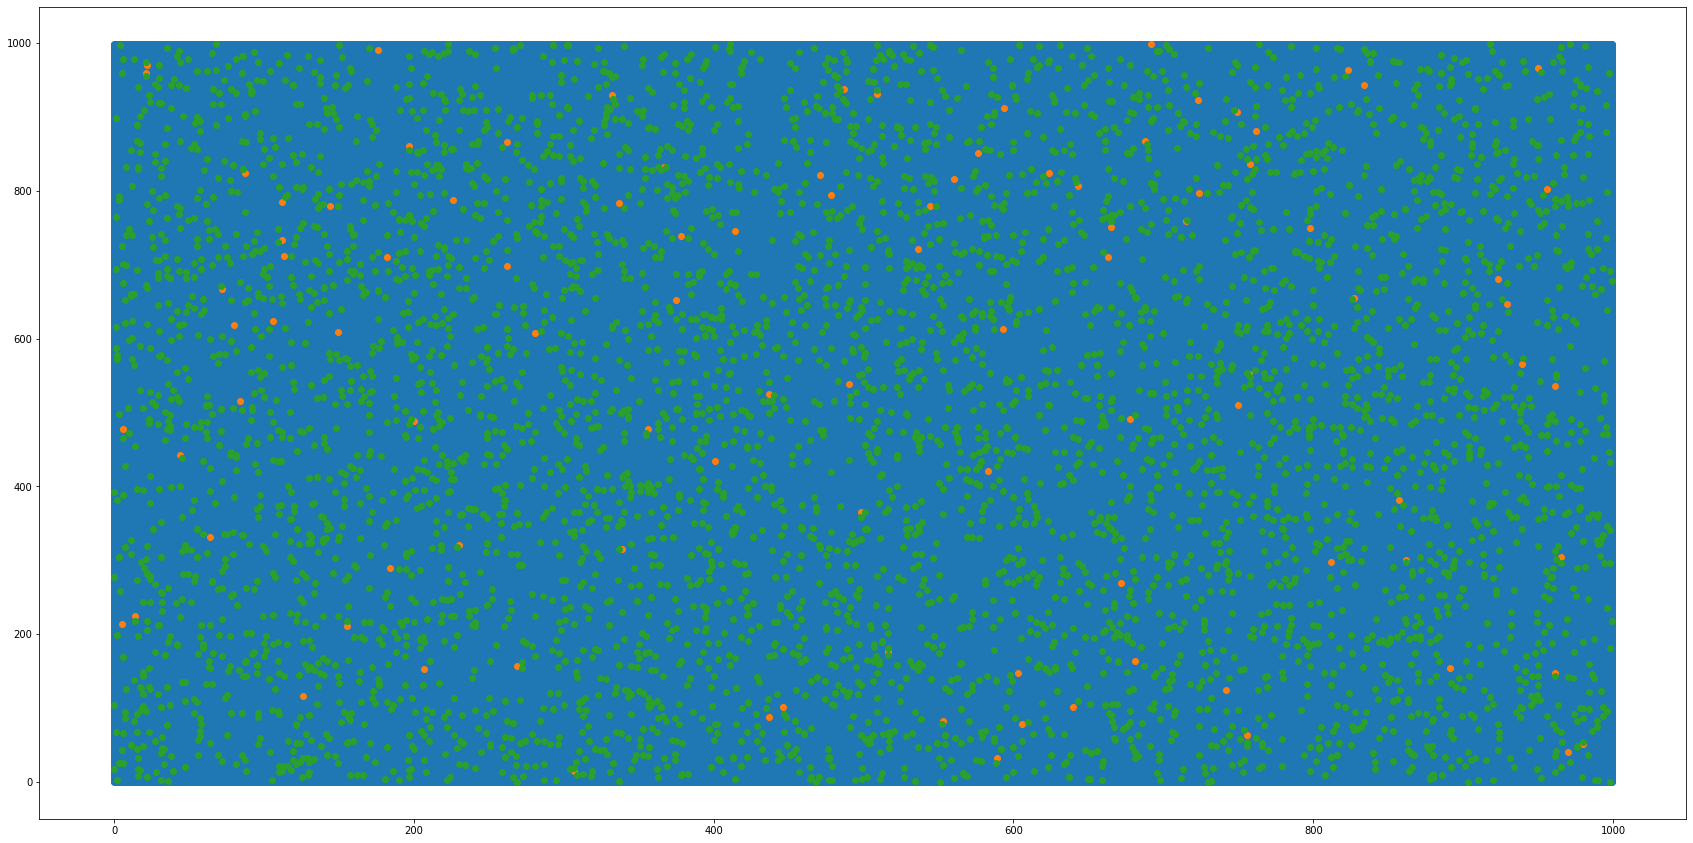

In [113]:
import matplotlib.pyplot as plt
import numpy as np

normal_np = np.array(normal_nodes)
alm_np = np.array(alm_nodes)
ent_np = np.array(ent_nodes)

plt.scatter(*zip(*normal_np))
plt.scatter(*zip(*alm_np))
plt.scatter(*zip(*ent_np))

cm = 1/2.54
plt.rcParams["figure.figsize"] = [60*cm, 30*cm]
plt.rcParams["figure.autolayout"] = True
plt.show()